In [1]:
# Langgraph works as an agenticAI. Others are also available like Autogen and CrewAI.

from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [2]:
class BMIState(TypedDict):
    weight_kg : float
    height_m : float
    bmi : float
    category : str

In [3]:
def bmi_calculator(state : BMIState) -> BMIState:
    weight = state['weight_kg']
    height = state['height_m']
    bmi = weight / (height**2)
    
    state['bmi'] = round(bmi, 2)
    return state

In [4]:
def bmi_categories(state: BMIState) -> BMIState:
    bmi = state['bmi']
    if bmi < 20:
        state["category"] = "Underweight"
    elif 20 <= bmi < 26:
        state["category"] = "Normal"
    elif 27 <= bmi < 32:
        state["category"] = "Overweight"
    else:
        state["category"] = "Obese"

    return state

In [5]:
graph = StateGraph(BMIState)

graph.add_node('bmi_calculator', bmi_calculator)
graph.add_node('bmi_categories', bmi_categories)

graph.add_edge(START, 'bmi_calculator')
graph.add_edge('bmi_calculator', 'bmi_categories')

graph.add_edge('bmi_categories', END)

wkflow = graph.compile()

In [6]:
initial_state = {'weight_kg' : 80, 'height_m' : 1.80}
final_state = wkflow.invoke(initial_state)
print(final_state)

{'weight_kg': 80, 'height_m': 1.8, 'bmi': 24.69, 'category': 'Normal'}


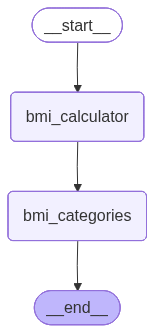

In [7]:
from IPython.display import Image
Image(wkflow.get_graph().draw_mermaid_png())